In [1]:
import torch.nn.functional as F
from utilities3 import *
from timeit import default_timer

import numpy as np
import torch
print(torch.__version__)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import summary
import sys
import netCDF4 as nc
from data_loader_SSH import load_test_data, load_test_data_DTAS
from data_loader_SSH import load_train_data, load_train_data_DTAS
from count_trainable_params import count_parameters
import hdf5storage

2.0.1+cu117
2.0.1+cu117


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
datastore_filepath = '/data/NASA_DTAS_datastore/'
filename_dict = {
    'u10' : 'U10_large_domain/U10deg_025',
    'v10' : 'V10_large_domain/V10deg_025',
    't2m' : 'T2m_large_domain/T2mdeg_025',
    'mslhf' : 'MSLHF_large_domain/MSLHFdeg_025',
    'msshf' : 'MSSHF_large_domain/MSSHFdeg_025'
}

In [4]:
def get_testdata(yr, vlist, lead):
    """
    high-level wrapper to extract input/label data in torch format from nc file for multiple variables
    --------------------------
    arg: year, list of variables to extract, lead no. of timestep
    
    """
    input_array_torch = torch.zeros((2,2,2,2))
    label_array_torch = torch.zeros((2,2,2,2))
    grid_size = 0

    for i,v in enumerate(vlist):
        DS = nc.Dataset(datastore_filepath + filename_dict[v] + str(yr) + '.nc')
        if i == 0:
            input_array_torch, label_array_torch, grid_size  = load_test_data_DTAS(DS, lead, v)
        else:
            input_torch, label_torch, _ = load_test_data_DTAS(DS, lead, v)
            input_array_torch = torch.concatenate((input_array_torch, input_torch), axis=1)
            label_array_torch = torch.concatenate((label_array_torch, label_torch), axis=1)
            
    return input_array_torch, label_array_torch, grid_size

def get_traindata(yr, vlist, lead, trainN):
    """
    high-level wrapper to extract input/label data in torch format from nc file for multiple variables
    --------------------------
    arg: year, list of variables to extract, lead no. of timestep
    
    """
    input_array_torch = torch.zeros((2,2,2,2))
    label_array_torch = torch.zeros((2,2,2,2))
    grid_size = 0

    for i,v in enumerate(vlist):
        DS = nc.Dataset(datastore_filepath + filename_dict[v] + str(yr) + '.nc')
        if i == 0:
            input_array_torch, label_array_torch, grid_size  = load_train_data_DTAS(DS, lead, trainN, v)
        else:
            input_torch, label_torch, _ = load_train_data_DTAS(DS, lead, trainN, v)
            input_array_torch = torch.concatenate((input_array_torch, input_torch), axis=1)
            label_array_torch = torch.concatenate((label_array_torch, label_torch), axis=1)
            
    return input_array_torch, label_array_torch, grid_size

        
    

In [5]:
year = 2019
varlist = ['mslhf', 'msshf']
lead = 1

In [13]:
in_array, out_array, ogrid = get_testdata(2019, ['u10', 'v10', 't2m'], lead)

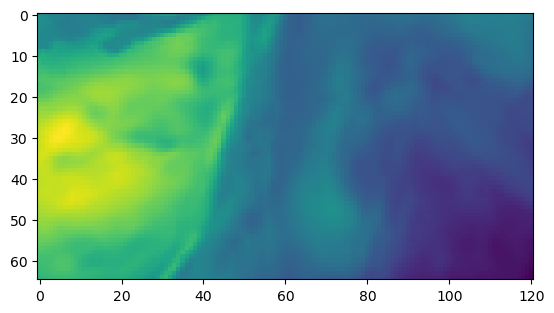

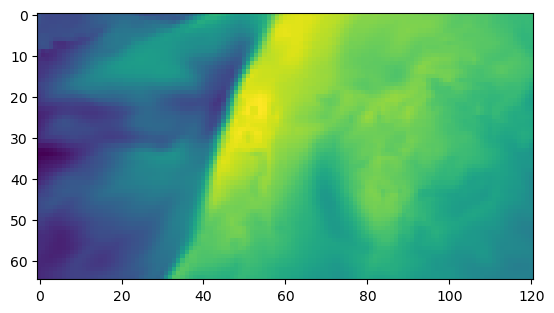

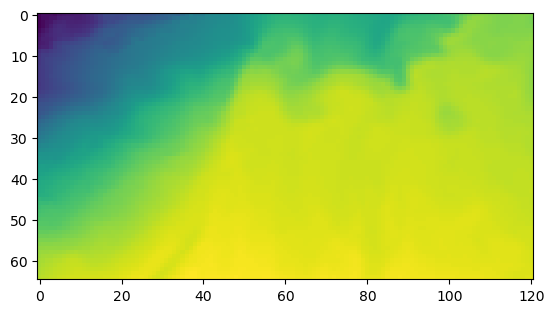

In [16]:
plt.imshow(in_array[500,0,:,:])
plt.show()
plt.imshow(in_array[500,1,:,:])
plt.show()
plt.imshow(in_array[500,2,:,:])
plt.show()


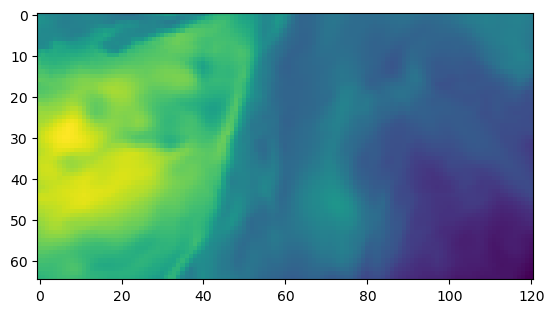

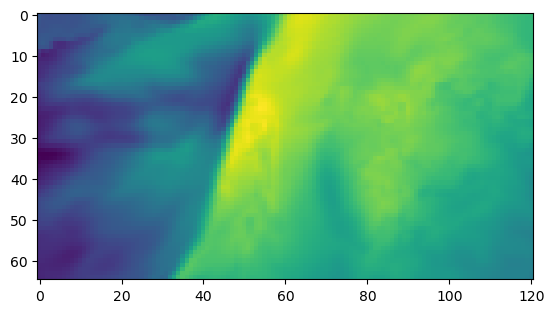

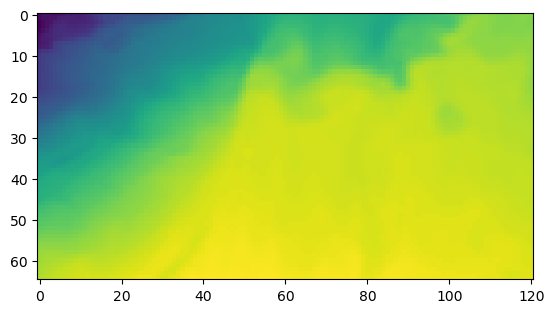

In [18]:
plt.imshow(out_array[500,0,:,:])
plt.show()
plt.imshow(out_array[500,1,:,:])
plt.show()
plt.imshow(out_array[500,2,:,:])
plt.show()